# I. Data Preprocessing

In [55]:
# Read the CSV file
import pandas as pd
df = pd.read_csv("./dataset/clinical/data.csv")

## 1. Data cleaning
### 1) Row ID

In [56]:
df.iloc[:, 0]

0        X21.V1.791
1        X15.V1.924
2           X8.V1.1
3         X16.V1.60
4         X20.V1.54
            ...    
11495    X22.V1.114
11496    X19.V1.354
11497      X8.V1.28
11498    X10.V1.932
11499    X16.V1.210
Name: Unnamed: 0, Length: 11500, dtype: object

In [57]:
# Split the first column into three new columns
df[['second_no', 'version', 'pid']] = df.iloc[:, 0].str.split('.', expand=True)

# Extract the numeric parts and replace X and V directly
df['second_no'] = df['second_no'].str.extract('(\d+)').astype(int)  # Replace X with its numeric part
df['version'] = df['version'].str.extract('(\d+)').astype(int)  # Replace V with its numeric part
# Convert the 'num' column to integer for sorting
# Fill None values in 'num' with a default value (e.g., 0)
df['pid'] = df['pid'].fillna(0).astype(int)
# Rename the 'Unnamed: 0' column to 'id'
df.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

# Reorder the columns to move num, X, V between id and X1
df = df[['id', 'pid', 'second_no', 'version', 'X1'] + [col for col in df.columns if col not in ['id', 'pid', 'second_no', 'version', 'X1']]]

# Sort the DataFrame by the 'num' column
df_sorted = df.sort_values(by=['version', 'pid', 'second_no'])

# Display the sorted DataFrame
df_sorted.head(50)

,id,pid,second_no,version,X1,X2,X3,X4,X5,X6,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
9065,X1.V1,0,1,1,12,22,35,45,69,74,...,-18,-32,-47,-53,-48,-40,-17,-23,-32,5
9699,X2.V1,0,2,1,-41,-50,-53,-49,-35,-28,...,34,22,4,-18,-31,-27,-26,-21,-30,5
2988,X3.V1,0,3,1,-45,-60,-73,-70,-70,-51,...,1,-21,-38,-44,-31,-17,4,35,59,5
3227,X4.V1,0,4,1,68,63,52,45,46,45,...,-22,-47,-68,-85,-92,-96,-83,-73,-66,5
8967,X5.V1,0,5,1,-59,-48,-35,-22,4,18,...,4,-5,-16,-29,-35,-21,3,35,66,5
7494,X6.V1,0,6,1,92,97,86,67,38,3,...,-25,-13,-2,-15,-27,-44,-40,-21,3,5
6756,X7.V1,0,7,1,14,10,7,-14,-49,-88,...,41,48,39,27,17,17,21,30,43,5
1702,X8.V1,0,8,1,50,63,69,72,84,93,...,42,30,16,3,-17,-24,-20,-14,-27,5
10720,X9.V1,0,9,1,-24,-25,-22,-16,-10,-9,...,-2,0,-3,-18,-36,-41,-39,-30,-17,5
4706,X10.V1,0,10,1,-14,-19,-30,-33,-31,-28,...,9,11,17,39,54,54,34,29,31,5


Here we can see that:
- pid (X): participant number
- second_no: the second number (23 seconds per patient)
- version (V): the version of the data
- 178 columns stands for the 178 samples within one second

Except for Version 1, We found 4 different versions (11,12,13,14), each of the version has 23 rows of data. 

In [58]:
df['version'].unique()

array([ 1, 14, 12, 13, 11])

In [59]:
df[df['version'] != 1].sort_values(by=['version', 'pid', 'second_no']).head(50)

,id,pid,second_no,version,X1,X2,X3,X4,X5,X6,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
3841,X1.V11,0,1,11,-24,-22,-17,-18,-19,-14,...,33,46,36,31,33,37,45,33,20,4
7371,X2.V11,0,2,11,-1,-19,-30,-29,-33,-29,...,-59,-41,-19,18,37,40,32,27,10,4
11434,X3.V11,0,3,11,-11,-35,-64,-81,-90,-71,...,26,31,39,46,46,48,48,54,46,4
5149,X4.V11,0,4,11,54,43,38,18,-8,-27,...,-31,-17,-27,-28,-44,-27,2,19,26,4
7813,X5.V11,0,5,11,17,6,-10,-21,-31,-44,...,-97,-81,-64,-32,4,20,18,17,19,4
9833,X6.V11,0,6,11,17,25,36,48,48,38,...,74,69,85,88,84,68,57,52,57,4
6859,X7.V11,0,7,11,64,82,93,89,78,69,...,12,10,7,-6,-40,-74,-89,-103,-107,4
6872,X8.V11,0,8,11,-102,-96,-81,-57,-23,-8,...,-18,-1,-3,-18,-43,-59,-64,-65,-67,4
2238,X9.V11,0,9,11,-50,-43,-37,-46,-75,-84,...,100,91,65,14,-13,-36,-40,-19,17,4
3920,X10.V11,0,10,11,51,79,94,97,108,114,...,-68,-56,-31,-5,-5,-3,3,16,12,4


Therefore, we will assign a unique participant id to each of these versions, and unify the version to 1.

In [60]:
# Find the maximum existing pid
max_pid = df['pid'].max()
# Identify unique versions that are not 1
versions_with_empty_pid = df[df['version'] != 1]['version'].unique()
# Assign a unique pid to each participant and unify the version to 1
for i, version in enumerate(versions_with_empty_pid):
    new_pid = max_pid + i + 1  # Start from max_pid + 1
    df.loc[(df['version'] == version), 'pid'] = new_pid
    df.loc[(df['version'] == version), 'version'] = 1

print (f"After data cleaning:")
print (f"There are {len(df['pid'].unique())} patients")
print (f"There are {len(df['second_no'].unique())} seconds per patient")
print (f"There are {len(df['version'].unique())} versions") 

After data cleaning:
There are 500 patients
There are 23 seconds per patient
There are 1 versions


### 2) Label
Kaggle dataset description: 
"5 - eyes open, means when they were recording the EEG signal of the brain the patient had their eyes open

4 - eyes closed, means when they were recording the EEG signal the patient had their eyes closed

3 - Yes they identify where the region of the tumor was in the brain and recording the EEG activity from the healthy brain area

2 - They recorder the EEG from the area where the tumor was located

1 - Recording of seizure activity

Although there are 5 classes most authors have done binary classification, namely class 1 (Epileptic seizure) against the rest."

So we convert 2-5 to 0: Non-seizure, and 1: Seizure

In [61]:
# Binary classification: 1: Seizure, 0: Non-seizure
# Change y value to 0 if y != 1
df['y'] = df['y'].apply(lambda x: 0 if x != 1 else x)

In [62]:
X = df.drop(columns=['pid', 'second_no', 'version', 'id', 'y'])  # Features
y = df['y']  # Target variable

# II. Making the test cases harder

Since this dataset is highly imbalanced: (80% non-seizure, 20% seizure), we will generate hard test cases to test the robustness of this model. 

Training details: To compare the results for different methods, we will limit:
1. Models: SVM(rbf kernel) and ANN;
2. Data: second-level data without temporal consideration;
3. Features: Total 178 data points;
4. Metrics: precision, recall, f1(weighted), accuracy, and cohen kappa.

## 0. Baseline

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score

def evaluate_classification_metrics(y_true, y_pred, y_pred_prob):
    # Calculate accuracy
    accuracy = accuracy_score(y_true, y_pred)
    
    # Calculate precision
    precision = precision_score(y_true, y_pred)
    
    # Calculate recall
    recall = recall_score(y_true, y_pred)
    
    # Calculate F1 score
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    if len(set(y_true)) > 1:
        # Check if ROC-AUC can be calculated (i.e., both classes are present)
        roc_auc = roc_auc_score(y_true, y_pred_prob)
        # Calculate Cohen's Kappa
        kappa = cohen_kappa_score(y_true, y_pred)
    else:
        roc_auc = None  # Not computable, only one class in y_true
        kappa = None
    
    # Calculate metrics for seizure class (y_label=1)
    precision_seizure = precision_score(y_true, y_pred, pos_label=1)
    recall_seizure = recall_score(y_true, y_pred, pos_label=1)
    f1_seizure = f1_score(y_true, y_pred, pos_label=1)
    
    # Calculate metrics for non-seizure class (y_label=0)
    precision_non_seizure = precision_score(y_true, y_pred, pos_label=0)
    recall_non_seizure = recall_score(y_true, y_pred, pos_label=0)
    f1_non_seizure = f1_score(y_true, y_pred, pos_label=0)
    
    print(f'\nSeizure (y=1):')
    print(f'  Precision: {precision_seizure * 100:.2f} %')
    print(f'  Recall: {recall_seizure * 100:.2f} %')
    print(f'  F1 Score: {f1_seizure * 100:.2f} %')
    
    print(f'\nNon-Seizure (y=0):')
    print(f'  Precision: {precision_non_seizure * 100:.2f} %')
    print(f'  Recall: {recall_non_seizure * 100:.2f} %')
    print(f'  F1 Score: {f1_non_seizure * 100:.2f} %')
    
    # Print metrics
    print(f'\nOverall:')
    print(f'  Accuracy: {accuracy * 100:.2f} %')
    print(f'  Precision: {precision * 100:.2f} %')
    print(f'  Recall: {recall * 100:.2f} %')
    print(f'  F1 Score: {f1 * 100:.2f} %')
    if roc_auc is not None:
        print(f'  ROC-AUC: {roc_auc * 100:.2f} %')
    if kappa is not None:
        print(f'  Cohen\'s Kappa: {kappa * 100:.2f} %')

    return {
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'roc_auc': roc_auc if roc_auc is not None else None,
    'kappa': kappa if kappa is not None else None,
}

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### SVM

In [11]:
from sklearn.svm import SVC

clf = SVC(class_weight='balanced')
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
y_pred_prob = clf.decision_function(X_test) 
baseline_svm = evaluate_classification_metrics(y_test, y_pred_svc, y_pred_prob)


Seizure (y=1):
  Precision: 92.34 %
  Recall: 95.92 %
  F1 Score: 94.09 %

Non-Seizure (y=0):
  Precision: 98.88 %
  Recall: 97.85 %
  F1 Score: 98.36 %

Overall:
  Accuracy: 97.43 %
  Precision: 92.34 %
  Recall: 95.92 %
  F1 Score: 97.45 %
  ROC-AUC: 99.54 %
  Cohen's Kappa: 92.46 %


### ANN

In [12]:
# Importing necessary libraries
import keras.backend as K
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, cohen_kappa_score


# Define the custom Focal Loss function
def focal_loss(gamma=2., alpha=0.25):
    """
    Focal Loss for binary classification.
    Arguments:
        gamma -- focusing parameter for modulating factor (1-p_t)
        alpha -- balancing factor for classes
    """
    def focal_loss_fixed(y_true, y_pred):
        # Convert y_true to float32 to match y_pred's data type
        y_true = K.cast(y_true, 'float32')
        
        # Clip predictions to prevent log(0)
        epsilon = K.epsilon()
        y_pred = K.clip(y_pred, epsilon, 1. - epsilon)

        # Calculate cross entropy
        cross_entropy = -y_true * K.log(y_pred)
        # Calculate weight for each example
        weight = alpha * K.pow((1 - y_pred), gamma)
        # Apply focal loss
        loss = weight * cross_entropy
        return K.mean(loss, axis=-1)
    
    return focal_loss_fixed


def ann(X_train, X_test, y_train, y_test, loss='bce'):
    # Initializing the ANN
    classifier = Sequential()
    
    # Adding the input layer and the first hidden layer
    classifier.add(Dense(units=80, kernel_initializer='uniform', activation='relu', input_dim=178))
    
    # Adding the second hidden layer
    classifier.add(Dense(units=80, kernel_initializer='uniform', activation='relu'))
    
    # Adding the output layer
    classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))
    
    # Compiling the ANN
    if loss == 'bce':
        classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    elif loss == 'focal_loss':
        classifier.compile(optimizer='adam', loss=focal_loss(gamma=3., alpha=0.5), metrics=['accuracy'])
    else:
        raise Exception("Please identify a loss function!")
    
    # Fitting the ANN to the training set without printing the epoch output
    classifier.fit(X_train, y_train, batch_size=10, epochs=100, verbose=0)
    
    return classifier

In [13]:
ann_clf  = ann(X_train, X_test, y_train, y_test)
y_pred_prob = ann_clf.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5)  # Convert probabilities to binary values
baseline_ann = evaluate_classification_metrics(y_test, y_pred, y_pred_prob)

/Users/naman/anaconda3/envs/accenture/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 422us/step

Seizure (y=1):
  Precision: 89.77 %
  Recall: 87.76 %
  F1 Score: 88.75 %

Non-Seizure (y=0):
  Precision: 96.71 %
  Recall: 97.29 %
  F1 Score: 97.00 %

Overall:
  Accuracy: 95.26 %
  Precision: 89.77 %
  Recall: 87.76 %
  F1 Score: 95.24 %
  ROC-AUC: 97.38 %
  Cohen's Kappa: 85.75 %


## 1. **Train-Test Split with Different Data**

### 1) Balanced test set, imbalanced training set
This setup can simulate how the model would perform in a scenario where it learns from the naturally imbalanced data (reflecting real-world distributions) but is tested in an environment where the two classes are equally represented (to focus on performance without bias toward the majority class).

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split

# Separate label 1 and label 0
X_label1 = X[y == 1]
X_label0 = X[y == 0]
y_label1 = y[y == 1]
y_label0 = y[y == 0]

# Step 1: Split label 0 (9200) - Take 1150 examples for test, the rest for training
X_train_label0, X_test_label0, y_train_label0, y_test_label0 = train_test_split(
    X_label0, y_label0, test_size=len(y_label1)//2, random_state=42)

# Step 2: Split label 1 (2300) - Take exactly 1150 examples for the test set
X_train_label1, X_test_label1, y_train_label1, y_test_label1 = train_test_split(
    X_label1, y_label1, test_size=len(y_label1)//2, random_state=42)

# Step 3: Combine the training and testing sets
# Combine label 1 and label 0 data for training set
X_train = np.vstack([X_train_label1, X_train_label0])
y_train = np.hstack([y_train_label1, y_train_label0])

# Combine label 1 and label 0 data for test set (test set will be balanced)
X_test = np.vstack([X_test_label1, X_test_label0])
y_test = np.hstack([y_test_label1, y_test_label0])

# Verify the balance of the test set
print("Test set label distribution:", np.bincount(y_test))
print("Train set label distribution:", np.bincount(y_train))

Test set label distribution: [1150 1150]
Train set label distribution: [8050 1150]


In [66]:
import tsaug
from tsaug.visualization import plot
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
import random  


def augment_data(features, labels, target_count):
    # Step 1: Count the number of data points for each class (0 and 1)
    count_0 = np.sum(labels == 0)
    count_1 = np.sum(labels == 1)

    print(f"Number of class 0: {count_0}")
    print(f"Number of class 1: {count_1}")

    # Step 2: Filter out the minority and majority class data
    class_0_data = features[labels == 0]
    class_1_data = features[labels == 1]

    augmenters = [
        tsaug.AddNoise(scale=0.05),
        tsaug.TimeWarp(n_speed_change=2),    
        tsaug.Drift(max_drift=(0.1, 0.5)),   
        # tsaug.Crop(size=0.9)               
    ]

    # Step 3: Function to augment data row by row
    def augment_row_by_row(data, target_size):
        augmented_data = []
        while len(augmented_data) < target_size:
            for row in data:
                if len(augmented_data) >= target_size:
                    break
                augmenter = random.choice(augmenters)
                augmented_row = augmenter.augment(np.expand_dims(row, axis=0))
                augmented_data.append(augmented_row[0])  # Append augmented row
        return np.array(augmented_data)

    # Step 4: Augment class 0 and class 1 data row by row until they each have 10,000 samples
    if count_0 < target_count:
        class_0_augmented = augment_row_by_row(class_0_data, target_count - count_0)
        class_0_data_final = np.vstack((class_0_data, class_0_augmented))  
    else:
        class_0_data_final = class_0_data

    if count_1 < target_count:
        class_1_augmented = augment_row_by_row(class_1_data, target_count - count_1)
        class_1_data_final = np.vstack((class_1_data, class_1_augmented))  
    else:
        class_1_data_final = class_1_data

    # Step 5: Create new labels for the augmented data
    class_0_labels = np.array([0] * len(class_0_data_final))
    class_1_labels = np.array([1] * len(class_1_data_final))

    # Step 6: Combine the augmented data from both classes
    new_features = np.vstack((class_0_data_final, class_1_data_final))
    new_labels = np.hstack((class_0_labels, class_1_labels))

    # Step 7: Shuffle the dataset
    X_train, y_train = shuffle(new_features, new_labels, random_state=42)

    # Final dataset information
    print(f"New dataset has {len(X_train)} samples with {np.sum(y_train == 0)} class 0 and {np.sum(y_train == 1)} class 1")

    # plot(class_0_data[0])  
    # plot(class_0_augmented[0])
    # plot(class_1_data[0])  
    # plot(class_1_augmented[0]) 
    return X_train, y_train

Number of class 0: 8050
Number of class 1: 1150
New dataset has 20000 samples with 10000 class 0 and 10000 class 1


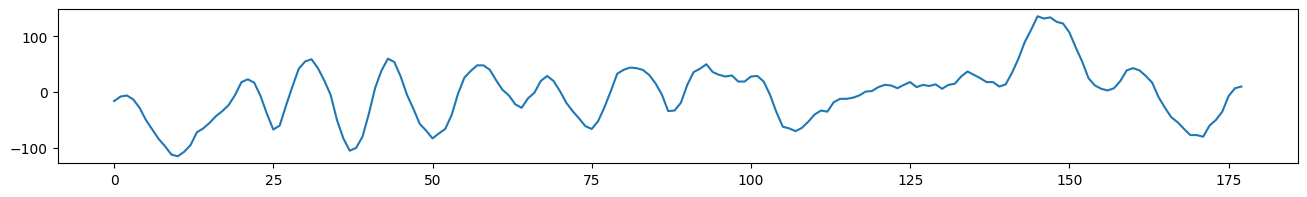

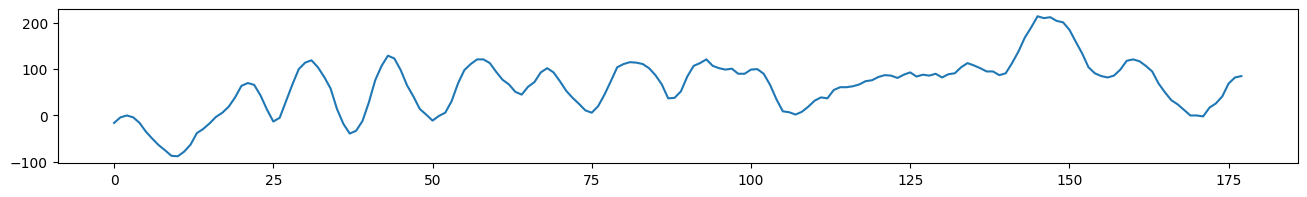

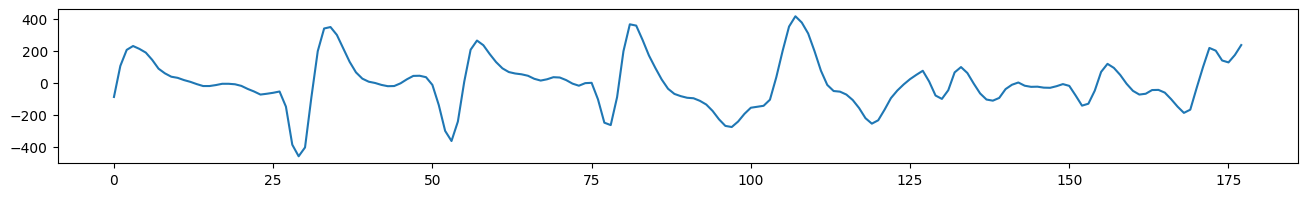

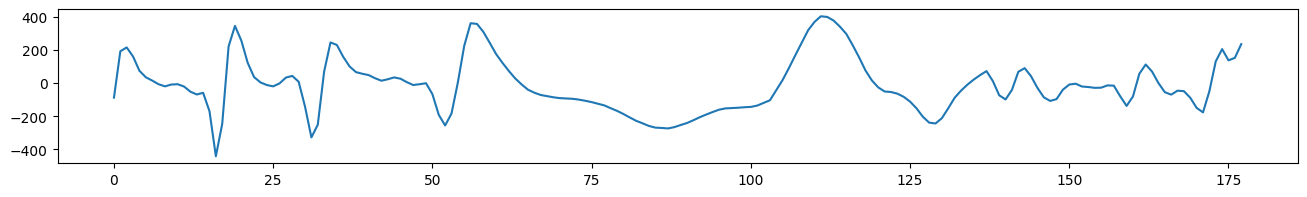

In [16]:
features = X_train
labels = y_train
target_count = 10000
X_train, y_train = augment_data(features, labels, target_count)

In [17]:
# SVC
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
y_pred_prob = clf.decision_function(X_test) 
metrics_svc = evaluate_classification_metrics(y_test, y_pred_svc, y_pred_prob)


Seizure (y=1):
  Precision: 98.46 %
  Recall: 94.78 %
  F1 Score: 96.59 %

Non-Seizure (y=0):
  Precision: 94.97 %
  Recall: 98.52 %
  F1 Score: 96.71 %

Overall:
  Accuracy: 96.65 %
  Precision: 98.46 %
  Recall: 94.78 %
  F1 Score: 96.65 %
  ROC-AUC: 99.57 %
  Cohen's Kappa: 93.30 %


In [18]:
y[y==1].count()

2300

In [19]:
# ANN
ann_clf  = ann(X_train, X_test, y_train, y_test)
y_pred_prob = ann_clf.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5)  # Convert probabilities to binary values
metrics_ann =evaluate_classification_metrics(y_test, y_pred, y_pred_prob)

/Users/naman/anaconda3/envs/accenture/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 394us/step

Seizure (y=1):
  Precision: 97.98 %
  Recall: 92.70 %
  F1 Score: 95.26 %

Non-Seizure (y=0):
  Precision: 93.07 %
  Recall: 98.09 %
  F1 Score: 95.51 %

Overall:
  Accuracy: 95.39 %
  Precision: 97.98 %
  Recall: 92.70 %
  F1 Score: 95.39 %
  ROC-AUC: 98.77 %
  Cohen's Kappa: 90.78 %


In [20]:
baseline_ann

{'accuracy': 0.9526086956521739,
 'precision': 0.8977035490605428,
 'recall': 0.8775510204081632,
 'f1_score': 0.9524114899916648,
 'roc_auc': 0.9738239936858721,
 'kappa': 0.8574985221226865}

In [21]:
Mikky_svc = {
 'accuracy': 0.9413,
 'precision': 0.9922,
 'recall': 0.8896,
 'f1_score': 0.9411,
 'roc_auc': 0.9963,
 'kappa': 0.8826
 }

Mikky_ann = {
 'accuracy': 0.9143,
 'precision': 0.9938,
 'recall': 0.8339,
 'f1_score': 0.9138,
 'roc_auc': 0.9554,
 'kappa': 0.8287
 }

metrics_data = {
    'SVC (Baseline)': baseline_svm,
    'SVC (Imbalanced train + balanced test)': Mikky_svc,
    'SVC (Imbal train + bal test) Augment train': metrics_svc,
    'ANN (Baseline)': baseline_ann,
    'ANN (Imbalanced train + balanced test)': Mikky_ann,
    'ANN (Imbalanced train + balanced test) Augment train': metrics_ann,
}

df_metrics = pd.DataFrame(metrics_data)
# df_metrics.T.sort_values(by='roc_auc', ascending=False)
df_metrics.T

,accuracy,precision,recall,f1_score,roc_auc,kappa
SVC (Baseline),0.974348,0.923379,0.959184,0.974524,0.995421,0.924564
SVC (Imbalanced train + balanced test),0.941300,0.992200,0.889600,0.941100,0.996300,0.882600
SVC (Imbal train + bal test) Augment train,0.966522,0.984643,0.947826,0.966510,0.995653,0.933043
ANN (Baseline),0.952609,0.897704,0.877551,0.952411,0.973824,0.857499
ANN (Imbalanced train + balanced test),0.914300,0.993800,0.833900,0.913800,0.955400,0.828700
ANN (Imbalanced train + balanced test) Augment train,0.953913,0.979779,0.926957,0.953880,0.987740,0.907826


### 2) Balanced training set, imbalanced test set
It will allow you to see whether the model, trained on a balanced dataset, can generalize well to an imbalanced situation, which is often what happens in real-world applications. The test set, in this case, acts as a "stress test" for the model. You'll be able to see whether the model, after being trained on a balanced set, overfits or generalizes well when faced with the majority class (non-seizure) during testing.
The true test of the model will be how well it can identify seizure cases in an environment dominated by non-seizure cases.

In [22]:
import numpy as np
from sklearn.model_selection import train_test_split

# Separate label 1 (seizure) and label 0 (non-seizure)
X_label1 = X[y == 1]
X_label0 = X[y == 0]
y_label1 = y[y == 1]
y_label0 = y[y == 0]

# Step 1: Manually assign 2300 samples from each class for the balanced training set
# (Since train_size=2300 is the full number, we take them all manually)
X_train_label1 = X_label1[:len(y_label1)//2]  # Take all 2300 seizure samples for training
y_train_label1 = y_label1[:len(y_label1)//2]

X_train_label0 = X_label0[:len(y_label1)//2]  # Take 2300 non-seizure samples for training
y_train_label0 = y_label0[:len(y_label1)//2]

# Step 2: The remaining samples will go into the imbalanced test set
X_rest_label1 = X_label1[len(y_label1)//2:]  # Remaining seizure samples
y_rest_label1 = y_label1[len(y_label1)//2:]

X_rest_label0 = X_label0[len(y_label1)//2:]  # Remaining non-seizure samples
y_rest_label0 = y_label0[len(y_label1)//2:]

# Combine training sets to form the balanced training set
X_train = np.vstack([X_train_label1, X_train_label0])
y_train = np.hstack([y_train_label1, y_train_label0])

# Combine the remaining samples to form the imbalanced test set
X_test = np.vstack([X_rest_label1, X_rest_label0])
y_test = np.hstack([y_rest_label1, y_rest_label0])

# Verify class distribution in training and test sets
print("Training set label distribution:", np.bincount(y_train))  # Should be balanced
print("Test set label distribution:", np.bincount(y_test))  # Will be imbalanced


Training set label distribution: [1150 1150]
Test set label distribution: [8050 1150]


Number of class 0: 1150
Number of class 1: 1150
New dataset has 20000 samples with 10000 class 0 and 10000 class 1


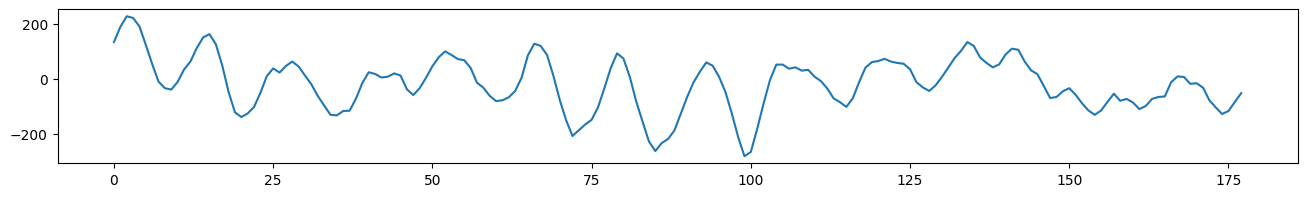

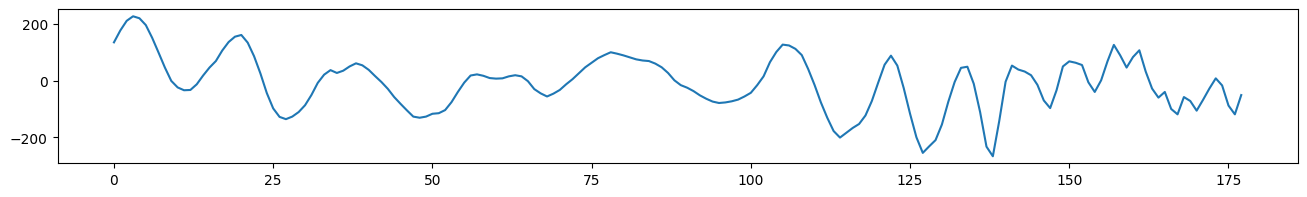

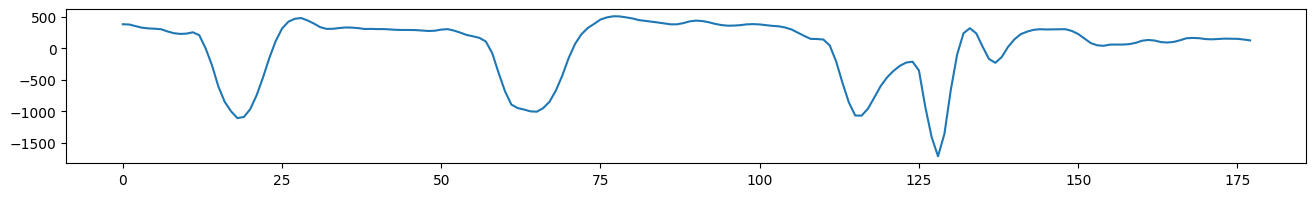

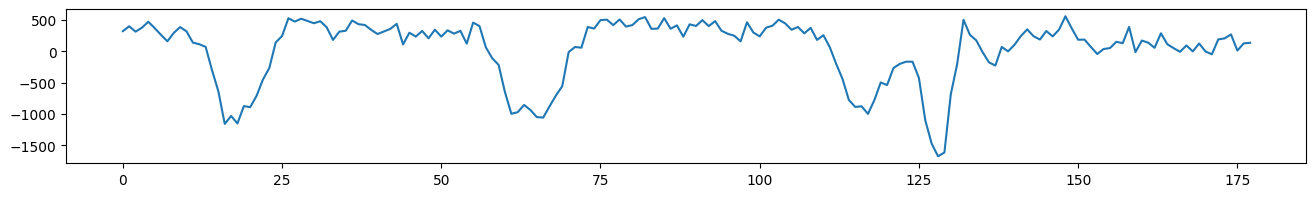

In [23]:
features = X_train
labels = y_train
target_count = 10000
X_train, y_train = augment_data(features, labels, target_count)

In [25]:
# SVC
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
y_pred_prob = clf.decision_function(X_test) 
metrics_svc_test2_augment = evaluate_classification_metrics(y_test, y_pred_svc, y_pred_prob)


Seizure (y=1):
  Precision: 84.44 %
  Recall: 94.35 %
  F1 Score: 89.12 %

Non-Seizure (y=0):
  Precision: 99.18 %
  Recall: 97.52 %
  F1 Score: 98.34 %

Overall:
  Accuracy: 97.12 %
  Precision: 84.44 %
  Recall: 94.35 %
  F1 Score: 97.19 %
  ROC-AUC: 99.18 %
  Cohen's Kappa: 87.46 %


In [26]:
# ANN
ann_clf  = ann(X_train, X_test, y_train, y_test)
y_pred_prob = ann_clf.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5)  # Convert probabilities to binary values
metrics_ann_test2_augment = evaluate_classification_metrics(y_test, y_pred, y_pred_prob)

/Users/naman/anaconda3/envs/accenture/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 311us/step

Seizure (y=1):
  Precision: 73.35 %
  Recall: 95.48 %
  F1 Score: 82.96 %

Non-Seizure (y=0):
  Precision: 99.32 %
  Recall: 95.04 %
  F1 Score: 97.14 %

Overall:
  Accuracy: 95.10 %
  Precision: 73.35 %
  Recall: 95.48 %
  F1 Score: 95.37 %
  ROC-AUC: 98.40 %
  Cohen's Kappa: 80.16 %


In [32]:
test2_metrics = {}
Mikky_svc = {
 'accuracy': 0.9651,
 'precision': 0.8143,
 'recall': 0.9338,
 'f1_score': 0.9661,
 'roc_auc': 0.9963,
 'kappa': 0.9901
 }

Mikky_ann = {
 'accuracy': 0.9099,
 'precision': 0.5878,
 'recall': 0.9339,
 'f1_score': 0.9182,
 'roc_auc': 0.9636,
 'kappa': 0.6711
 }


test2_metrics["SVC (Baseline)"] = baseline_svm
test2_metrics["SVC (bal train + imbal test"] = Mikky_svc
test2_metrics["SVC (bal train + imbal test) Augment train"] = metrics_svc_test2_augment

test2_metrics["ANN (Baseline)"] = baseline_ann
test2_metrics["ANN (bal train + imbal test)"] = metrics_ann_test2_augment
test2_metrics["ANN (bal train + imbal test) Augment train"] = metrics_ann_test2_augment

df_metrics_test2 = pd.DataFrame(metrics_data)
df_metrics_test2.T

,accuracy,precision,recall,f1_score,roc_auc,kappa
SVC (Baseline),0.974348,0.923379,0.959184,0.974524,0.995421,0.924564
SVC (bal train + imbal test,0.965100,0.814300,0.933800,0.966100,0.996300,0.990100
SVC (bal train + imbal test) Augment train,0.971196,0.844358,0.943478,0.971872,0.991844,0.874630
ANN (Baseline),0.952609,0.897704,0.877551,0.952411,0.973824,0.857499
ANN (bal train + imbal test),0.909900,0.587800,0.933900,0.918200,0.963600,0.671100
ANN (bal train + imbal test) Augment train,0.950978,0.733467,0.954783,0.953652,0.984021,0.801562


## 2. Seizure and non-seizure are difficult to distinguish

Look through the dataset and identify examples where the features for seizure and non-seizure are difficult to distinguish. These could be borderline cases or examples with a lot of noise or overlap between the classes.

### a. Points within support vectors
Support vectors are the data points that lie closest to the decision boundary. These points have the highest influence on determining the position of the boundary.

In [33]:
from sklearn.model_selection import train_test_split
def training_points_within_support_vectors(DEBUG = True):
    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = SVC(class_weight='balanced', probability=True)
    clf.fit(X_train, y_train)
    # Get the indices and support vectors from the training data
    support_vectors_indices = clf.support_
    support_vectors = clf.support_vectors_
    X_support_vectors = X_train.iloc[support_vectors_indices]
    y_support_vectors = y_train.iloc[support_vectors_indices]

    if DEBUG:
        print ("--------------------training_points_within_support_vectors--------------------")
        y_pred_within_support_vectors = clf.predict(support_vectors)
        y_pred_prob_within_support_vectors = clf.decision_function(support_vectors)
        evaluate_classification_metrics(y_support_vectors, y_pred_within_support_vectors, y_pred_prob_within_support_vectors)
        
    return X_support_vectors, y_support_vectors

### Testing Support vector and excluding it from training

In [64]:
def training_points_excluding_support_vectors(X,y,DEBUG=True):
    # Split the dataset into training and test sets
    # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    clf = SVC(probability=True)
    clf.fit(X, y)
    
    # Get the indices and support vectors from the training data
    support_vectors_indices = clf.support_
    
    # Remove support vectors from the training set
    X_train_no_support = X.drop(X.index[support_vectors_indices])
    y_train_no_support = y.drop(y.index[support_vectors_indices])
    
    X_support_vectors = X.iloc[support_vectors_indices]
    y_support_vectors = y.iloc[support_vectors_indices]

    if DEBUG:
        print("--------------------training_points_excluding_support_vectors--------------------")
        y_pred_within_support_vectors = clf.predict(clf.support_vectors_)
        y_pred_prob_within_support_vectors = clf.decision_function(clf.support_vectors_)
        hard_test1_metrics_svm_inc = evaluate_classification_metrics(y_support_vectors, y_pred_within_support_vectors, y_pred_prob_within_support_vectors)
        
    return X_train_no_support, y_train_no_support, X_support_vectors, y_support_vectors, hard_test1_metrics_svm_inc

In [35]:
print("Training points within support vectors:")
X_train, y_train, X_test, y_test, hard_test1_metrics_svm_inc = training_points_excluding_support_vectors(X,y)
from sklearn.svm import SVC

print("Support vectors as test and all other data as training:")
clf = SVC(probability=True)
clf.fit(X_train, y_train)
y_pred_svc = clf.predict(X_test)
y_pred_prob = clf.decision_function(X_test) 
hard_test1_metrics_svm_exc = evaluate_classification_metrics(y_test, y_pred_svc, y_pred_prob)

Training points within support vectors:
--------------------training_points_excluding_support_vectors--------------------


/Users/naman/anaconda3/envs/accenture/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/Users/naman/anaconda3/envs/accenture/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(



Seizure (y=1):
  Precision: 90.36 %
  Recall: 73.78 %
  F1 Score: 81.23 %

Non-Seizure (y=0):
  Precision: 77.61 %
  Recall: 92.04 %
  F1 Score: 84.21 %

Overall:
  Accuracy: 82.85 %
  Precision: 90.36 %
  Recall: 73.78 %
  F1 Score: 82.71 %
  ROC-AUC: 92.60 %
  Cohen's Kappa: 65.74 %
Support vectors as test and all other data as training:

Seizure (y=1):
  Precision: 69.50 %
  Recall: 48.60 %
  F1 Score: 57.20 %

Non-Seizure (y=0):
  Precision: 60.11 %
  Recall: 78.41 %
  F1 Score: 68.05 %

Overall:
  Accuracy: 63.41 %
  Precision: 69.50 %
  Recall: 48.60 %
  F1 Score: 62.59 %
  ROC-AUC: 72.84 %
  Cohen's Kappa: 26.96 %


### SVC Including support vector Augment Train

In [67]:
X_np = X.iloc[1:].to_numpy()
y_np = y.iloc[1:].to_numpy()
X_aug, y_aug = augment_data(X_np, y_np, 10000)
# Convert X and y back to DataFrame after augmentation
X = pd.DataFrame(X_aug, columns=[f'X{i+1}' for i in range(X.shape[1])])
y = pd.Series(y_aug, name='y')
# df_augmented = pd.concat([X_df, y_df], axis=1)
_,_,_,_,metrics_svc_inc_augment = training_points_excluding_support_vectors(X_aug,y_aug,DEBUG=True)

Number of class 0: 10000
Number of class 1: 9999
New dataset has 20000 samples with 10000 class 0 and 10000 class 1


AttributeError: 'numpy.ndarray' object has no attribute 'drop'

### SVC (Training excluding support vectors) Augment train

In [45]:
X_train_np = X_train.iloc[1:].to_numpy()
y_train_np = y_train.iloc[1:].to_numpy()

Number of class 0: 8635
Number of class 1: 1727
New dataset has 20000 samples with 10000 class 0 and 10000 class 1

Seizure (y=1):
  Precision: 67.41 %
  Recall: 53.15 %
  F1 Score: 59.43 %

Non-Seizure (y=0):
  Precision: 60.93 %
  Recall: 73.98 %
  F1 Score: 66.83 %

Overall:
  Accuracy: 63.50 %
  Precision: 67.41 %
  Recall: 53.15 %
  F1 Score: 63.11 %
  ROC-AUC: 69.44 %
  Cohen's Kappa: 27.09 %


/Users/naman/anaconda3/envs/accenture/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(
/Users/naman/anaconda3/envs/accenture/lib/python3.10/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


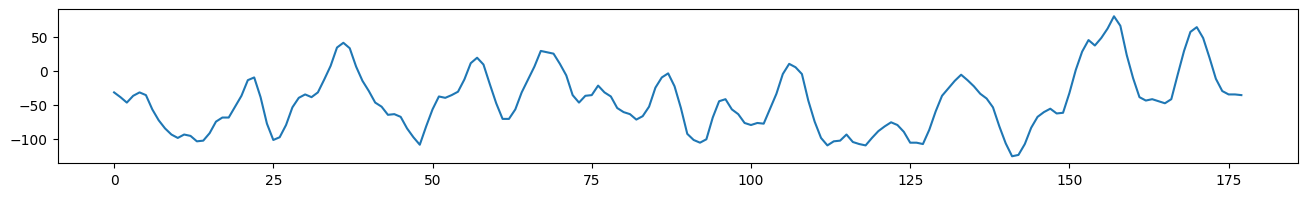

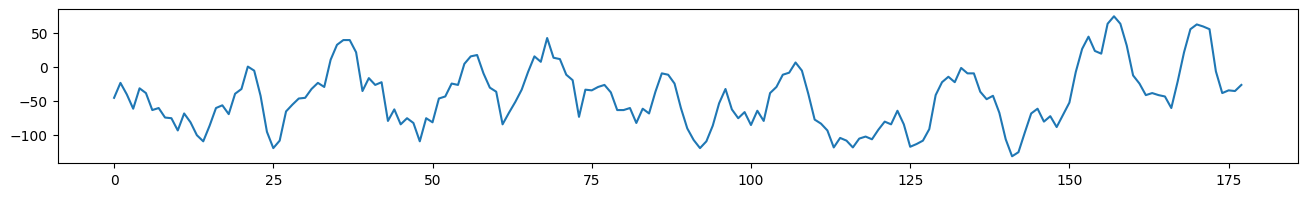

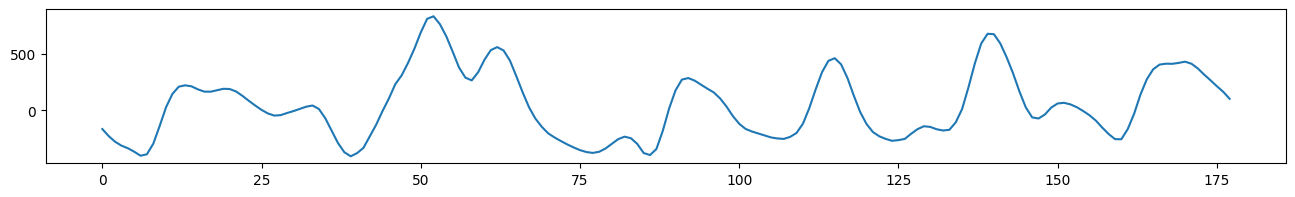

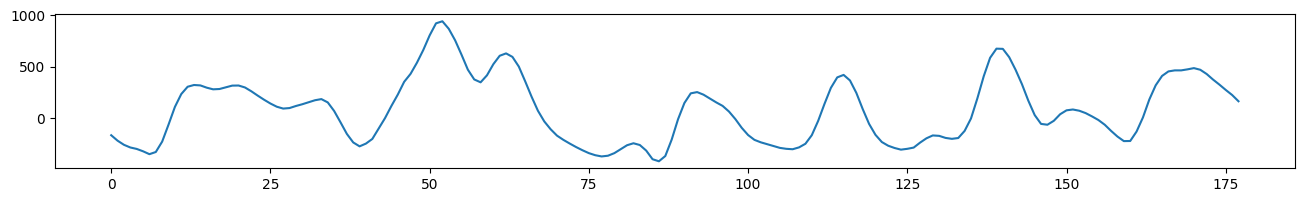

In [46]:
X_train_augment, y_train_augment = augment_data(X_train_np, y_train_np, 10000)
clf = SVC(probability=True)
clf.fit(X_train_augment, y_train_augment)
y_pred_svc = clf.predict(X_test)
y_pred_prob = clf.decision_function(X_test) 
hard_test1_metrics_svm_exc_augment = evaluate_classification_metrics(y_test, y_pred_svc, y_pred_prob)

In [54]:
test3_metrics = {}

test3_metrics["SVC (Baseline)"] = baseline_svm
test3_metrics["SVC (Points within Support Vector)"] = hard_test1_metrics_svm_inc
test3_metrics["SVC (Points within Support Vector) Augment train"] = metrics_svc_inc_augment
test3_metrics["SVC (Training excluding support vectors)"] =hard_test1_metrics_svm_exc
test3_metrics["SVC (Training excluding support vectors) Augment train"] =hard_test1_metrics_svm_exc_augment

df_metrics_test3 = pd.DataFrame(test3_metrics)
df_metrics_test3.T

,accuracy,precision,recall,f1_score,roc_auc,kappa
SVC (Baseline),0.974348,0.923379,0.959184,0.974524,0.995421,0.924564
SVC (Points within Support Vector),0.828496,0.903640,0.737762,0.827121,0.926044,0.657369
SVC (Points within Support Vector) Augment train,0.776388,0.813015,0.721491,0.775749,0.826036,0.553076
SVC (Training excluding support vectors),0.634125,0.695000,0.486014,0.625920,0.728353,0.269583
SVC (Training excluding support vectors) Augment train,0.635004,0.674058,0.531469,0.631070,0.694359,0.270937


### b. Distance to the Decision Boundary:
You can use the decision_function method to calculate the distance of each point to the decision boundary. Points with values close to 0 are near the boundary, indicating that the model is less confident in its prediction.

#### SVM

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [44]:
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, cohen_kappa_score
from sklearn.model_selection import train_test_split

def get_points_near_decision_boundary(X_test, y_test, y_pred, decision_distances, distance_threshold):
    # Find the cases where the absolute value of the distance is close to 0 (i.e., near the boundary)
    boundary_cases = np.where(np.abs(decision_distances) < distance_threshold)[0]  # Adjust the threshold as needed
    
    # Get the vectors and labels near the decision boundary
    X_near_boundary = X_test.iloc[boundary_cases]
    y_near_boundary = y_test.iloc[boundary_cases]
    y_pred_near_boundary = y_pred[boundary_cases]
    decision_distances_near_boundary = decision_distances[boundary_cases]  # Filter decision distances
    
    # Print the number of points near the decision boundary
    print(f"Number of points near the decision boundary: {X_near_boundary.shape[0]}")
    
    evaluate_classification_metrics(y_near_boundary, y_pred_near_boundary, decision_distances_near_boundary)

In [47]:
clf = SVC(class_weight='balanced', probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
# Get the decision function (distance from the decision boundary)
decision_distances = clf.decision_function(X_test)
get_points_near_decision_boundary(X_test, y_test, y_pred, decision_distances, 0.1)

Number of points near the decision boundary: 15

Seizure (y=1):
  Precision: 37.50 %
  Recall: 60.00 %
  F1 Score: 46.15 %

Non-Seizure (y=0):
  Precision: 71.43 %
  Recall: 50.00 %
  F1 Score: 58.82 %

Overall:
  Accuracy: 53.33 %
  Precision: 37.50 %
  Recall: 60.00 %
  F1 Score: 54.60 %
  ROC-AUC: 58.00 %
  Cohen's Kappa: 8.70 %


#### ANN

In [68]:
def get_points_near_decision_threshold_ann(X_test, y_test, y_pred, decision_probabilities, threshold=0.5, distance_threshold=0.05):
    """
    Get points where the predicted probability is near the decision threshold (e.g., near 0.5).
    For ANN, we check how close the probabilities are to the threshold.
    
    Args:
    - X_test: Features from the test set
    - y_test: True labels for the test set
    - y_pred: Binary predictions from the model
    - decision_probabilities: Predicted probabilities from the model
    - threshold: The decision threshold (default is 0.5)
    - distance_threshold: How close a probability needs to be to the threshold to be considered "near"
    """
    # Find the cases where the predicted probabilities are near the threshold (e.g., near 0.5)
    boundary_cases = np.where(np.abs(decision_probabilities - threshold) < distance_threshold)[0]
    
    # Get the vectors and labels near the threshold
    X_near_boundary = X_test.iloc[boundary_cases] if hasattr(X_test, 'iloc') else X_test[boundary_cases]
    y_near_boundary = y_test.iloc[boundary_cases] if hasattr(y_test, 'iloc') else y_test[boundary_cases]
    y_pred_near_boundary = y_pred[boundary_cases]
    decision_prob_near_boundary = decision_probabilities[boundary_cases]
    
    # Print the number of points near the decision threshold
    print(f"Number of points near the decision threshold: {X_near_boundary.shape[0]}")
    print(y_near_boundary.value_counts())
    # Evaluate classification metrics on these points
    evaluate_classification_metrics(y_near_boundary, y_pred_near_boundary, decision_prob_near_boundary)


# Example usage
ann_clf = ann(X_train, X_test, y_train, y_test)  # Replace with your ANN training
y_pred_prob = ann_clf.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int).ravel()  # Binary predictions

# Find points where the predicted probabilities are near 0.5
get_points_near_decision_threshold_ann(X_test, y_test, y_pred, y_pred_prob, threshold=0.5, distance_threshold=0.1)

/Users/naman/anaconda3/envs/accenture/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 671us/step
Number of points near the decision threshold: 47
1    39
0     8
Name: y, dtype: int64

Seizure (y=1):
  Precision: 77.27 %
  Recall: 43.59 %
  F1 Score: 55.74 %

Non-Seizure (y=0):
  Precision: 12.00 %
  Recall: 37.50 %
  F1 Score: 18.18 %

Overall:
  Accuracy: 42.55 %
  Precision: 77.27 %
  Recall: 43.59 %
  F1 Score: 49.35 %
  ROC-AUC: 46.47 %
  Cohen's Kappa: -10.25 %


### c. Misclassified Points 


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [57]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd


def get_error_points(y_test, y_pred, y_pred_prob):
    # Step 1: Identify error cases (misclassified points)
    error_mask = y_test != y_pred  # Boolean mask for misclassified points
    y_error_true = y_test[error_mask]
    y_error_pred = y_pred[error_mask]
    y_error_prob = y_pred_prob[error_mask]
    
    # Step 2: Print number of error cases and label distribution
    print(f"\nNumber of error cases: {len(y_error_true)}")
    print(f"Label distribution in error cases (actual labels):")
    print(pd.Series(y_error_true).value_counts())  # Distribution of true labels in error cases
    
    evaluate_classification_metrics(y_error_true, y_error_pred, y_error_prob)

#### SVM

In [55]:
clf = SVC(class_weight='balanced', probability=True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_prob = clf.decision_function(X_test)
get_error_points(y_test, y_pred, y_pred_prob)


Number of error cases: 61
Label distribution in error cases (actual labels):
y
0    47
1    14
Name: count, dtype: int64

Seizure (y=1):
  Precision: 0.00 %
  Recall: 0.00 %
  F1 Score: 0.00 %

Non-Seizure (y=0):
  Precision: 0.00 %
  Recall: 0.00 %
  F1 Score: 0.00 %

Overall:
  Accuracy: 0.00 %
  Precision: 0.00 %
  Recall: 0.00 %
  F1 Score: 0.00 %
  ROC-AUC: 0.00 %
  Cohen's Kappa: -54.72 %


#### ANN

In [58]:
ann_clf = ann(X_train, X_test, y_train, y_test)
y_pred_prob = ann_clf.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int).ravel()
get_error_points(y_test, y_pred, y_pred_prob)

72/72 [==============================] - 0s 323us/step

Number of error cases: 99
Label distribution in error cases (actual labels):
y
0    66
1    33
Name: count, dtype: int64

Seizure (y=1):
  Precision: 0.00 %
  Recall: 0.00 %
  F1 Score: 0.00 %

Non-Seizure (y=0):
  Precision: 0.00 %
  Recall: 0.00 %
  F1 Score: 0.00 %

Overall:
  Accuracy: 0.00 %
  Precision: 0.00 %
  Recall: 0.00 %
  F1 Score: 0.00 %
  ROC-AUC: 0.00 %
  Cohen's Kappa: -80.00 %


## Distinct patients

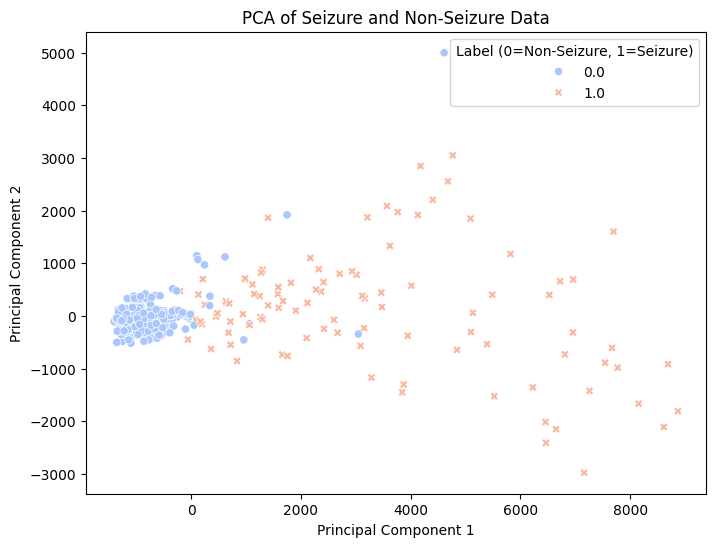

Variance explained by PCA Component 1: 4058974.43
Variance explained by PCA Component 2: 336480.35
Explained variance ratio of PCA components: [0.85463066 0.07084706]


In [89]:
import pandas as pd
from scipy.stats import skew, kurtosis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Extract statistical features for each second (row) in the DataFrame
# Assuming df has columns from 'X1' to 'X178', and 'pid' and 'y' as participant and label respectively
statistical_features = df.loc[:, 'X1':'X178'].agg(['min', 'max', 'median', 'mean', 'std', 'skew', 'kurtosis'], axis=1)

# Step 2: Add 'pid' and 'y' columns to the statistical features DataFrame
df_with_stats = pd.concat([df[['pid', 'y']].reset_index(drop=True), statistical_features.reset_index(drop=True)], axis=1)

# Step 3: Group by 'pid' to combine all 23 seconds of data for each participant into one row
# We will concatenate 7 features for each of the 23 seconds, resulting in 161 features per participant
def concatenate_features(group):
    # Concatenate features for all seconds into one list
    combined_features = group.iloc[:, 2:].values.flatten()  # Exclude 'pid' and 'y'
    pid = group['pid'].iloc[0] 
    label = group['y'].iloc[0]  # The label should be the same for all rows of the same pid
    return pd.Series(np.concatenate([combined_features, [label]]))

# Apply the concatenation for each participant (pid)
combined_df = df_with_stats.groupby('pid').apply(concatenate_features)

# Rename columns to reflect the new feature structure
feature_columns = [f'feature_{i+1}' for i in range(combined_df.shape[1] - 2)]  # Feature columns
combined_df.columns = feature_columns + ['pid', 'label']  # Adding 'pid' and 'label'

# Step 4: Perform PCA to reduce 161 features to 2 features
X = combined_df.iloc[:, :-2].values  # All feature columns
y = combined_df['label'].values  # Labels (non-seizure/seizure)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Step 5: Visualize the 2 features with different colors for labels
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', style=y)
plt.title('PCA of Seizure and Non-Seizure Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Label (0=Non-Seizure, 1=Seizure)')
plt.show()

# Step 6: Quantitative metrics on variation
# Calculating variance between individuals
variance = np.var(X_pca, axis=0)
print(f"Variance explained by PCA Component 1: {variance[0]:.2f}")
print(f"Variance explained by PCA Component 2: {variance[1]:.2f}")

# Optional: Print explained variance ratio from PCA
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio of PCA components: {explained_variance_ratio}")


In [98]:
from scipy.spatial.distance import euclidean

# Step 5: Compute the centroid of the PCA-transformed data
centroid = np.mean(X_pca, axis=0)

# Step 6: Compute Euclidean distance of each participant from the centroid
distances = np.array([euclidean(row, centroid) for row in X_pca])

# Step 7: Set a threshold to identify outliers (e.g., top 5% with highest distance)
threshold = np.percentile(distances, 90)  # Top 5% are considered distinct
outliers = combined_df[distances > threshold]

# Print out the PIDs and labels of outliers
print(f"Participants with distinct behavior (top 5% based on PCA distance):")
print(outliers[['pid', 'label']])

Participants with distinct behavior (top 5% based on PCA distance):
          pid  label
pid                 
104  1.250951    1.0
116  0.593233    1.0
117 -0.342965    1.0
124 -0.919183    1.0
164 -0.352596    1.0
184 -0.333980    1.0
216  1.106548    1.0
234 -0.309741    1.0
244  0.566907    1.0
264  0.351424    1.0
274 -1.024647    1.0
294  0.721955    1.0
324  0.317635    1.0
334  0.637745    1.0
344 -0.717574    1.0
364  2.602717    1.0
404 -0.659542    1.0
416 -1.154109    1.0
417 -0.560452    1.0
434 -0.074955    1.0
454  0.696912    1.0
464  0.921288    1.0
484  0.167622    1.0
517  0.260732    1.0
574  1.232750    1.0
584 -0.827808    1.0
593 -0.420974    0.0
594  1.703288    1.0
616  2.065898    1.0
644 -0.697702    1.0
664 -0.235938    1.0
674  1.732178    1.0
716 -0.656863    1.0
724  0.701475    1.0
754  0.161214    1.0
784 -0.094586    1.0
794 -1.088221    1.0
804  2.025129    1.0
814  4.644703    0.0
816  0.439009    1.0
817 -1.259711    1.0
844  1.297810    1.0
864  0.0

In [99]:
outliers[outliers['label'] == 0]

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_153,feature_154,feature_155,feature_156,feature_157,feature_158,feature_159,feature_160,pid,label
pid,,,,,,,,,,,,,,,,,,,,,
593,-609.0,380.0,-181.5,-91.662921,240.766359,0.257825,-1.033126,-440.0,337.0,-92.5,...,-0.056627,-0.475104,-906.0,767.0,-86.5,-18.668539,375.396946,0.373438,-0.420974,0.0
814,-425.0,41.0,-216.5,-176.696629,118.441709,0.482446,-0.872801,-126.0,2047.0,41.0,...,2.501630,5.918843,-319.0,2047.0,-23.0,127.084270,541.484253,2.246827,4.644703,0.0
